In [3]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt
from scipy.stats import norm, multivariate_normal

In [359]:
VAR_ERR = 0.07
N_SAMPLES = 7
LINSPACE_N = 30
DEGREE = 1

In [383]:

def f(x):
    return -0.3 + 0.4*x

def phi(x):
    """For non lineal functions"""
    return x



def plot_gaussian(S, w):
    x, y = np.mgrid[-1:1:.01, -1:1:.01]
    pos = np.dstack((x, y))
    rv = multivariate_normal(w, S)
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.contourf(x, y, rv.pdf(pos))
    plt.show()
    
    
    
def plot_map(samples, w=None):
    """Maximum a posteriori"""
    linspace = np.linspace(-1, 1, LINSPACE_N)
    
    # real function
    plt.plot(linspace, f(linspace))
    plt.scatter(samples[:,0], samples[:, 1])
    
    
    if w is not None:
        n = w.shape[0]
        plot_design_matrix = np.ones((LINSPACE_N, n))
        plot_design_matrix[:, 1] = phi(linspace)
        plt.plot(linspace, plot_design_matrix@w)
    plt.show()

def plot_gaussian_sample(S, w, n_samples):
    """
    Gets n samples from the p(w) distribution and plots it
    """
    linspace = np.linspace(-1, 1, LINSPACE_N)
    plot_design_matrix = np.ones((LINSPACE_N, n))
    plot_design_matrix[:, 1] = phi(linspace)
    rv = multivariate_normal(w, S)
    
    w_samples = rv.rvs(n_samples)
    for i in range(n_samples):
        plt.plot(linspace, plot_design_matrix@w_samples[i])
    plt.show()
    
    
def plot_posterior(w, S, current_samples):
    median_values = []
    variances = []

    linspace = np.linspace(-1, 1, LINSPACE_N)
    n = w.shape[0]
    
    for point in linspace:
        # For each point in the prediction horizon, we get one distribution with a median value and variance
        design_vector = np.ones((n, 1))
        design_vector[1, :] = phi(point)
        median = w.T@design_vector
        median_values.append(median[0])
        variance = sigma_squared + design_vector.T@S@design_vector
        variances.append(variance[0][0])
        
        
        


    median_values = np.array(median_values)
    variances = np.array(variances)    



    fig, ax = plt.subplots()
    ax.fill_between(plot_linspace, median_values + 2*variances, median_values - 2*variances, alpha=0.2)
    ax.plot(plot_linspace, median_values)
    ax.scatter(current_samples[:,0], current_samples[:,1])
    ax.plot(plot_linspace, f(plot_linspace))

    plt.show()


    

In [384]:
linspace = np.linspace(-1, 1, N_SAMPLES)
plot_linspace = np.linspace(-1, 1, LINSPACE_N)
y = f(linspace) + norm.rvs(loc=0, scale=VAR_ERR, size=N_SAMPLES)
real = f(linspace)




samples = np.dstack((linspace,y))[0]
np.random.shuffle(samples)


In [385]:
def update_S(old_S, design_matrix, sigma_squared):
    """returns S^-1"""
    # nxn + (nxm@mxn)/scalar
    
    return inv(old_S) + (design_matrix.T@design_matrix)/sigma_squared


def update_w(S, old_S, old_w, design_matrix, target, sigma_squared):
    # nxn(nxn@nx1 + nxm@mx1)
    
    return S@(inv(old_S)@old_w + (design_matrix.T@target)/sigma_squared)

# Define parameters


In [399]:
sigma_squared = VAR_ERR
tau_squared = 0.5
m, n = samples.shape

In [400]:
S_0 = np.identity(2)*tau_squared
w_0 = np.zeros((2,))
# w_0 = np.array([-0.2,0.5])

design_matrix = np.ones((m, n))
design_matrix[:, 1] = phi(samples[:, 0])
target = samples[:, 1]

 # One sweep 

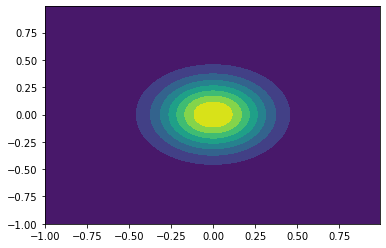

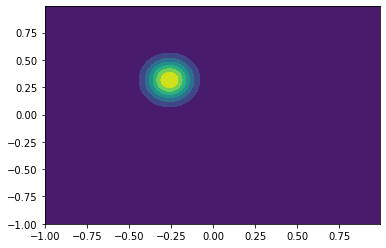

In [401]:
S_inv = update_S(S_0, design_matrix, sigma_squared)
S = inv(S_inv)
w = update_w(S, S_0, w_0, design_matrix, target, sigma_squared)
plot_gaussian(S_0,w_0)
plot_gaussian(S,w)


# Incremental


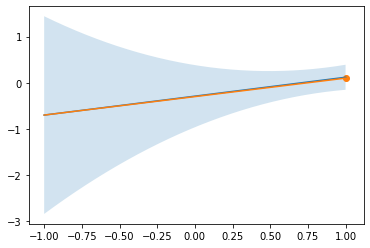

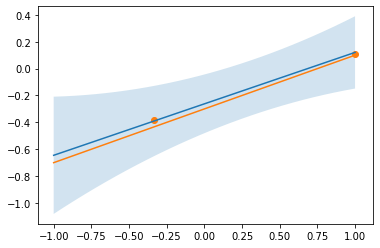

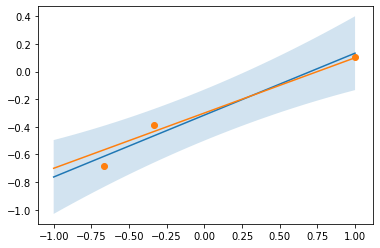

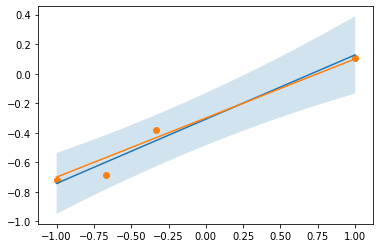

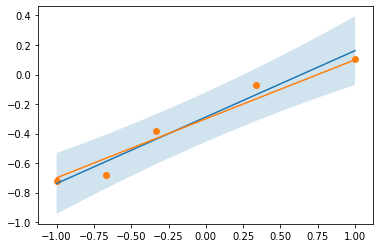

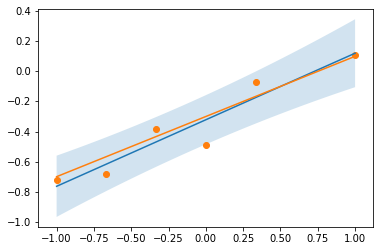

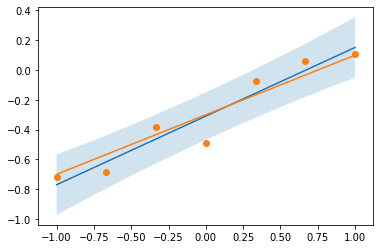

In [395]:
current_S = S_0
current_w = w_0
current_samples = []
for i in range(N_SAMPLES):
    new_S_inv = update_S(current_S, np.array([design_matrix[i]]), sigma_squared)
    new_S = inv(new_S_inv)
    new_w = update_w(new_S, current_S, current_w, np.array([design_matrix[i]]), np.array([target[i]]), sigma_squared)
    current_S, current_w = new_S, new_w
    current_samples.append(samples[i])

#     plot_gaussian(current_S,current_w)
#     plot_map(np.array(current_samples), w=current_w)
#     plot_gaussian_sample(current_S, current_w, 20)
    plot_posterior(current_w, current_S, np.array(current_samples))




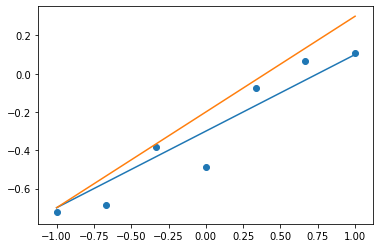

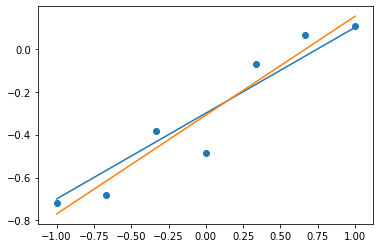

In [396]:
plot_map(samples, w=w_0)
plot_map(samples, w=w)



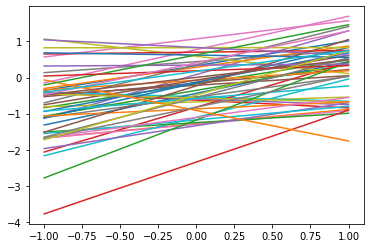

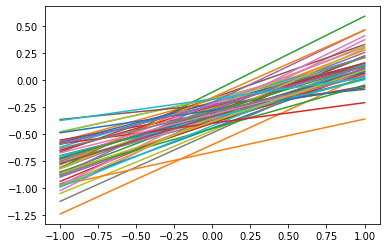

In [398]:
n_samples = 5
plot_gaussian_sample(S_0, w_0, n_samples)
plot_gaussian_sample(S, w, n_samples)